# Netflix Exploratory Data Analysis
----

## Introduction 

In this notebook, I'll give an Exploratory Data Analysis of the Netflix dataset from Kaggle. We will explore the data and hopefully bring some insights. 
* We will unveil;
  * the distribution of genres, 
  * the distribution of countries, and
  * the distribution of duration
* We will see yearly and monthly contents and how many are those.
* We will understand insides of contents by examining content description using WordCloud

Dataset: https://www.kaggle.com/datasets/shivamb/netflix-shows

**The Outline of this notebook is as follows**
1. Basic Data Exploration
   * Feature Exploration
   * Summary Statistics
2. Data Cleaning
   * Null Value Analysis
   * Checking Dublicate Values
   * Handling inconsistent or incorrect data
3. Exploratory data analysis (Answering questions we have of the data) 
   1. Close look at the data in the dataset (with agg)
   2. What is the Story Of Data
4. ML Modeling
   1. Label Encoding
   2. Linear Regression Model


---

#### Importing Libraries and Loading the Dataset

In [78]:
# Import Relevant Packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
from wordcloud import WordCloud

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [46]:
# Set some Options
# ensure that all columns will be displayed in their entirety when printing a DataFrame.
pd.set_option("display.max_columns", None)
# set the display width to 500 characters
pd.set_option("display.width", 500)

In [47]:
# Load Data set
df = pd.read_csv('data_sets/netflix_titles.csv')

## Basic Data Exploration
1. Feature Exploration
2. Summary Statistics

#### 1. Feature Exploration

First, let us take a look at a quick peek of what the first three rows in the data has in store for us and what features we have

In [48]:
# First 3 Data
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


In [49]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description'], dtype='object')

In this dataset we have,
* Type identifier; Movie or Tv Show
* Titles 
* Directors
* Actors
* Country where the Movie or Tv Show was produced
* Date it was added on Netflix
* Actual Release year of the Content
* Ratings
* Total Duration - in minutes or number of seasons

##### Next, let us take a look at how large the data is:

In [50]:
df.shape

(8807, 12)

We have 8807 Entity from 12 Feature

##### Okay. Lets look What types of data we have

In [51]:
# Data types in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


We Have:
* 11 Categorical Feature
* 1 Numeric Feature

#### 2. Summary Statistics

Here we can see basic statistics in the data

In [52]:
# Summary statistics for numerical features
numerical_features = df.select_dtypes(include='number')
# We have only 'release_year' as a numeric feature
numerical_features.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


Content release year analysis looks like this;
* We have content that has been the released year 1925 to 2021.
* We have the mean year 2014
* We have a standard deviation of ~ 8.82 and this can show us; we have release_year data spreads from 1925 to 2021, probably we have outliers mostly from 1925 to 2014

In [53]:
# Summary statistics for categorical features
categorical_features = df.select_dtypes(include='object')
categorical_features.describe().T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


We can see in this summary; frequency of data, unique values, and most repeated data

## Data Cleaning
1. Null Value Analysis
2. Checking Dublicate Values
3. Handling inconsistent or incorrect data

#### 1. Null Value Analysis

In [54]:
# Is there any null value in dataset
df.isnull().values.any()

True

WE have null values in dataset, but where?

<Axes: >

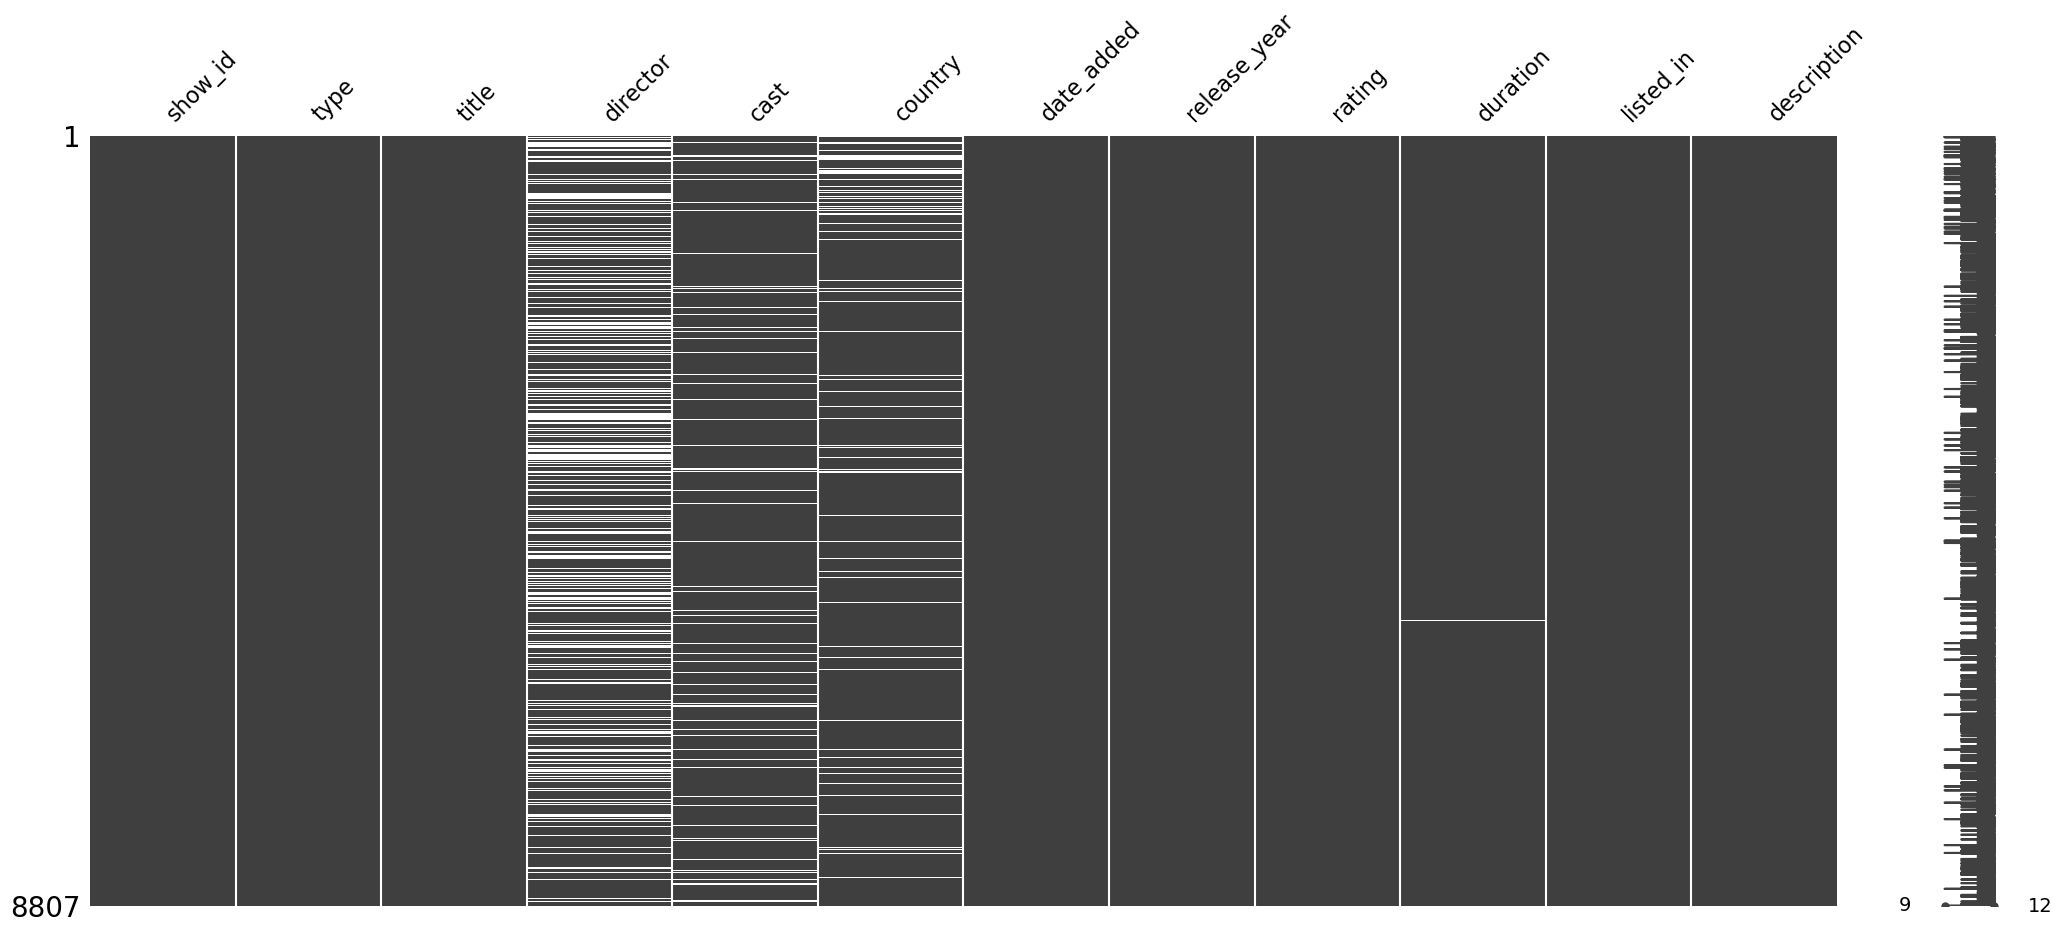

In [55]:
# Which features have how much null values?
msno.matrix(df)

As we can see, the missing values now become much more apparent and clear when we visualize it. White bands shows us missing data values and dark gray ones are non-missing data.
* We're seeing that dataset a lot of missing director data,
* And we have missing data on cast and country
* We have some missing data on duration

This visualization is really good seeing big picture of missing values. But We need specific number and percentage of missing values. 

In [56]:
def missing_value_table(df, get_null_columns=False):
    # find columns that only have null values
    null_columns = [col for col in df.columns
                    if df[col].isnull().sum() > 0]
    
    # Null Value counts
    null_counts = df[null_columns].isnull().sum().sort_values(ascending=True)

    # Null Value Percentage
    null_value_rates = (df[null_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
    formatted_null_value_rates = null_value_rates.apply(lambda value: f"% {str(np.round(value, 2))}")

    # Null Value Table
    null_df = pd.concat([null_counts, formatted_null_value_rates],
                        axis=1, keys=["Null Value Count", "Null Value Rates"])
    print(null_df, end="\n")

    if get_null_columns:
        return null_columns
    

missing_value_table(df)

            Null Value Count Null Value Rates
duration                   3           % 0.03
rating                     4           % 0.05
date_added                10           % 0.11
cast                     825           % 9.37
country                  831           % 9.44
director                2634          % 29.91


In this table we have more knowledge for missing values
* These features are categorical types, for this reason, so it might be a good idea to eliminate conversion of these values to 'missing' data.

In [57]:
# Turn null values to 'missing'
columns_to_fill = missing_value_table(df, get_null_columns=True)
df[columns_to_fill] = df[columns_to_fill].fillna('missing')

            Null Value Count Null Value Rates
duration                   3           % 0.03
rating                     4           % 0.05
date_added                10           % 0.11
cast                     825           % 9.37
country                  831           % 9.44
director                2634          % 29.91


In [58]:
# Controlling null values again
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

**Null Values are elimated**

#### 2. Checking Dublicate Values

Checking for duplicating values before EDA always a good idea

In [59]:
# Is there any duplicates
duplicated_rows = df[df.duplicated()]
print(f"Dublicates value number in dataset: {duplicated_rows.shape[0]}")

Dublicates value number in dataset: 0


There is no dublicated value in dataset; **Good**

#### 3. Handling inconsistent or incorrect data

We need to look for incorrect data. There's a lot of unique data in dataset, this is normal for movie or tv shows data.
But we can look rating data, if it has incorrect data.

In [60]:
def plot_categorical_frequency(data, x_label, y_label, title):
    """Show Bar Frequency for categorical Features"""
    frequency_counts = data.value_counts()
    
    plt.figure(figsize=(10, 6))
    plt.bar(frequency_counts.index, frequency_counts.values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.xticks(rotation=45) 
    plt.show()

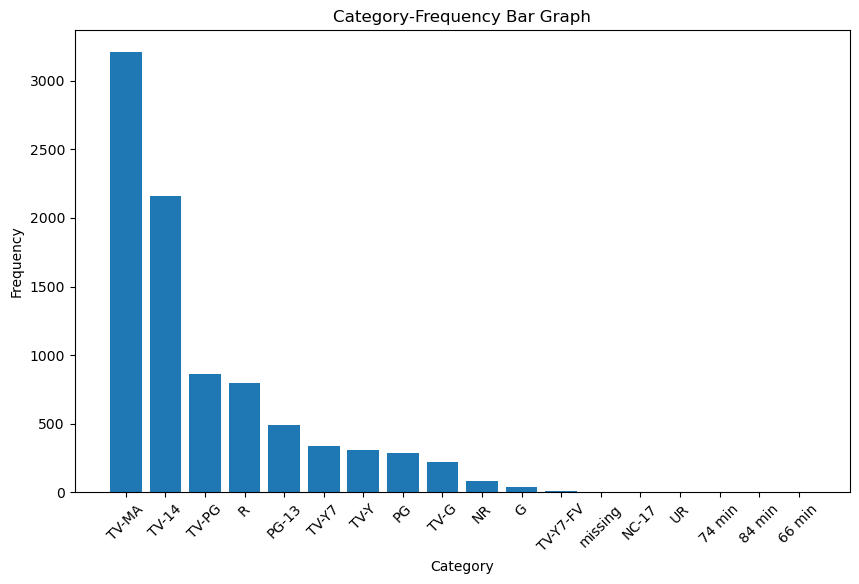

In [61]:
# 'rating' Feature
plot_categorical_frequency(df["rating"], "Category", "Frequency", "Category-Frequency Bar Graph")

with 'rating' frequency analysis we see three unwanted values entered: '74 min', '84 min', '66 min'
* We can eliminate these with turning values to 'UR'; Because UR means, *Unrated*
* And we can turn 'missing' values to 'UR' as well

In [62]:
# Change '74 min', '84 min', '66 min' Values to 'UR'
df['rating'] = np.where(np.isin(df['rating'], ['74 min', '84 min', '66 min', 'missing']), 'UR', df['rating'])

We eliminated sneaky values in ratings. 

Is There any sneaky values in release_year?

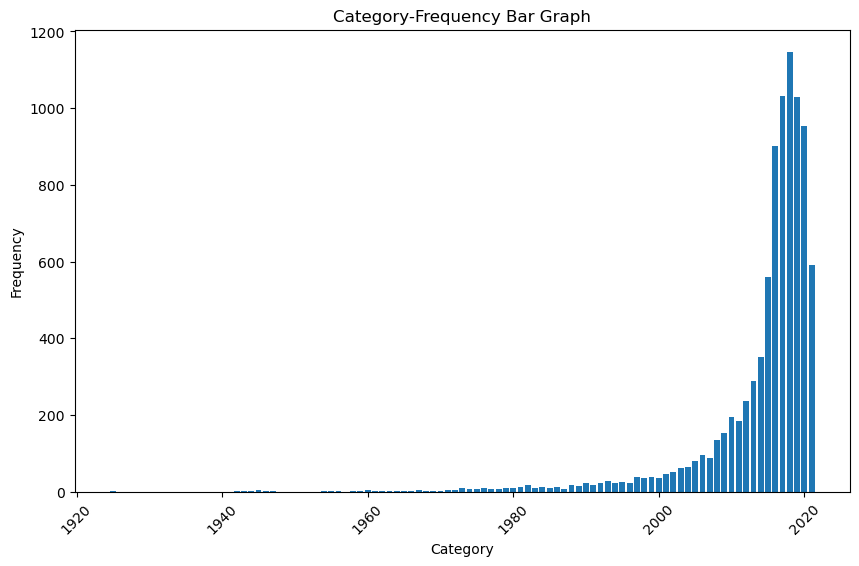

In [63]:
plot_categorical_frequency(df["release_year"], "Category", "Frequency", "Category-Frequency Bar Graph")

Seems like all of the data in release_year correct format

For other columns data we can't see wrong data's with visualizing it. Because unique value count is really high

There's other ways to clean data's as well: bu this notebook I did not enter those. Now we can enter the EDA part.

## EDA

#### 1. Content Types
   1. First, let's look at the percentage of movies and TV shows in the dataset.

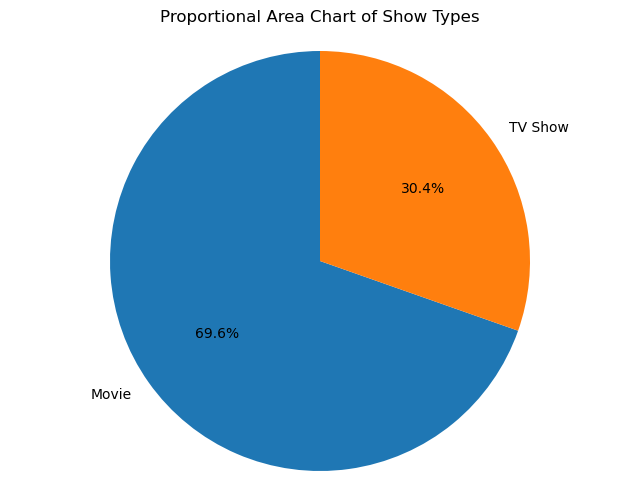

In [64]:
type_counts = df['type'].value_counts()
total_shows = type_counts.sum()

# Calculate proportions
proportions = type_counts / total_shows

# Plotting the proportional area chart
plt.figure(figsize=(8, 6))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Proportional Area Chart of Show Types')
plt.show()

#### 2. Time Analysis

1. First, let's look at the distribution of content by **released years.**

In [83]:
# Count the occurrences of each year
year_counts = df['release_year'].value_counts().sort_index()

# Create a stacked area graph using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=year_counts.index,
    y=year_counts.values,
    mode='none',
    fill='tozeroy',
    hovertemplate='Year: %{x}<br>Count: %{y}<extra></extra>',
    name='Count'
))

# Customize the axes labels and title
fig.update_layout(
    xaxis=dict(title='Year'),
    yaxis=dict(title='Count'),
    title='Distribution of Content by Release Year'
)

# Show the stacked area graph
fig.show()

2. We saw release years. But we need to look at another feature 'date_added' for understanding which year and month, and how much content was added to Netflix. Because the release of years of movies or TV Shows is different from the entrance of Netflix.

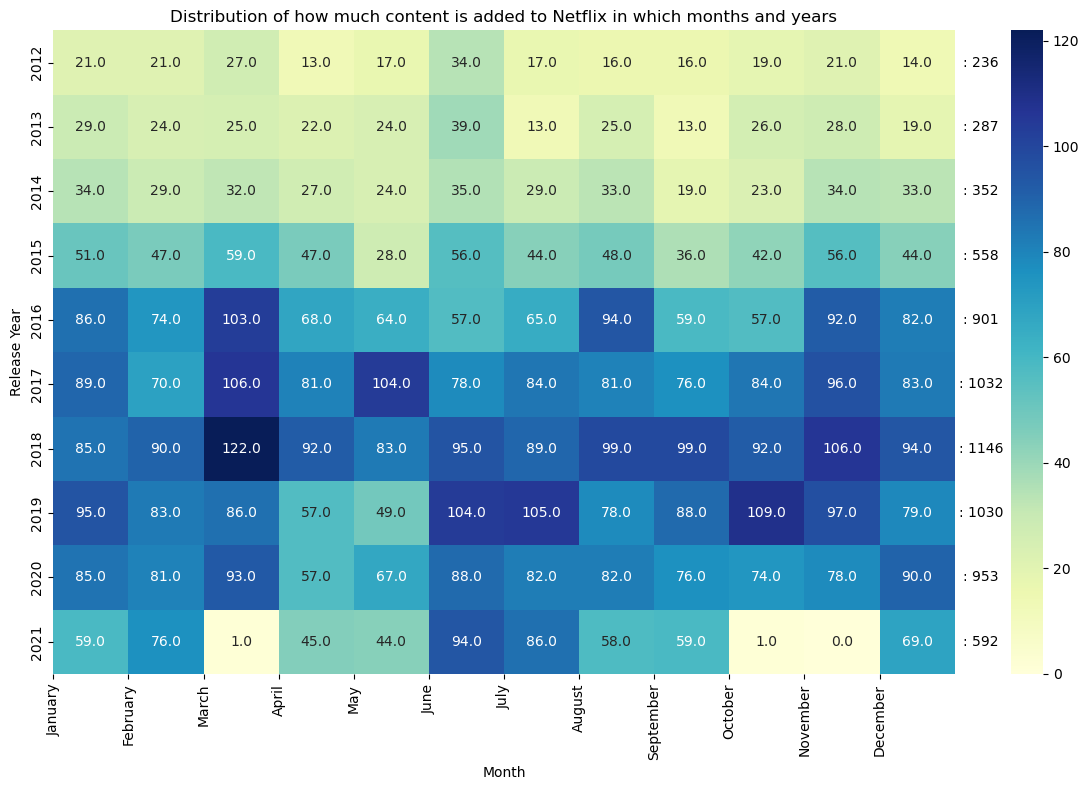

In [84]:
# Filter out rows with 'missing' in the 'date_added' column
filtered_df = df[df['date_added'] != 'missing'].copy()

filtered_df.loc[:, 'release_date'] = pd.to_datetime(filtered_df['date_added'])
filtered_df.loc[:, 'release_month'] = filtered_df['release_date'].dt.month_name()

# Count the occurrences of each release year
year_counts = filtered_df['release_year'].value_counts()

# Select the years with the most movies
top_years = year_counts.head(10).index

# Filter the data for the selected years
filtered_df = filtered_df[filtered_df['release_year'].isin(top_years)].copy()

# Count the occurrences of each release year and month combination
release_counts = filtered_df.groupby(['release_year', 'release_month']).size().unstack().fillna(0)

# Create a heatmap plot
plt.figure(figsize=(12, 8))  # Set the figure size
sns.heatmap(release_counts, cmap='YlGnBu', annot=True, fmt=".1f")

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Release Year')
plt.title('Distribution of how much content is added to Netflix in which months and years')

# Customize x-axis tick labels to show month names
month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                'August', 'September', 'October', 'November', 'December']
plt.xticks(ticks=range(0, 12), labels=month_labels)

# Add total count annotations for each year below the bars
for i, year in enumerate(release_counts.index):
    plt.text(12.35, i + 0.5, f': {year_counts.loc[year]}', ha='center', va='center')

# Display the plot
plt.tight_layout()
plt.show()

**Observations** 
* Most content was added in March 2018 by 122 number.
* The density of content numbers in Netflix, from which we received the data, belongs to the years 2017, 2018, 2019.

#### 3. Content Numbers by Country

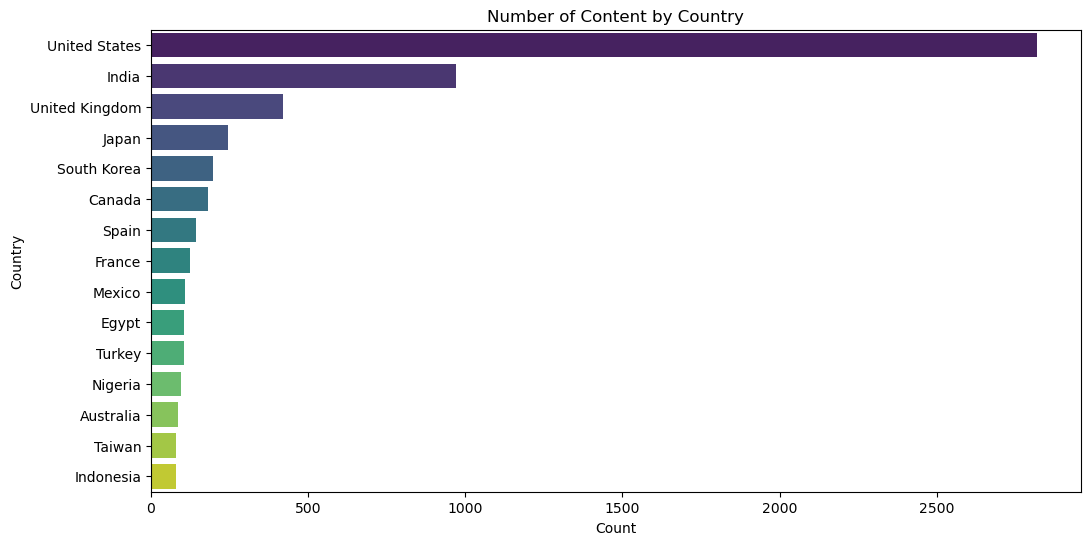

In [112]:
# Filter out rows with 'missing' in the 'country' column
filtered_df = df[df['country'] != 'missing'].copy()

# Count the occurrences of each country
country_counts = filtered_df['country'].value_counts()

# Select the top 10 countries with the most content
top_countries = country_counts.head(15)

# Create a bar plot
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Number of Content by Country')

# Display the plot
plt.show()

**Observations** 
* We are seeing here, top 15 countries producing the most content
  * US, India, UK, Japan and South Korea on top

#### 4. Rating analysis

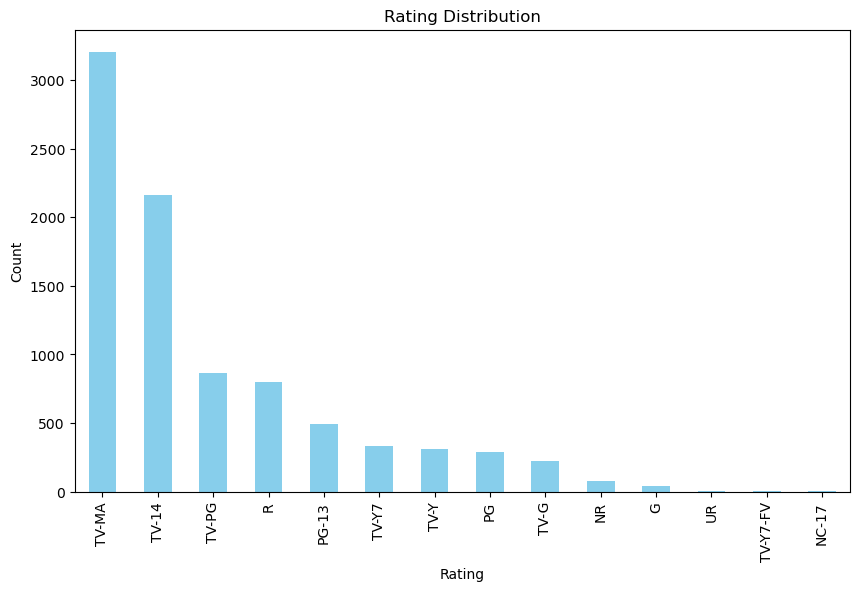

In [ ]:
# Filter out rows with 'missing' in the 'rating' column
filtered_df = df[df['rating'] != 'missing'].copy()

# Count the occurrences of each rating
rating_counts = filtered_df['rating'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')

# Display the plot
plt.show()

**Observations** 
* Most used ratings TV-MA, TV-14, TV-PG is used in tv shows;
  * That means Tv shows mostly for Mature or 14+
* R rating in fourth place used in Movies;
  * That means Movies in Netflix mostly for Mature
* We can say Netflix better place for adult, and mature content

#### 5. Popular Genres

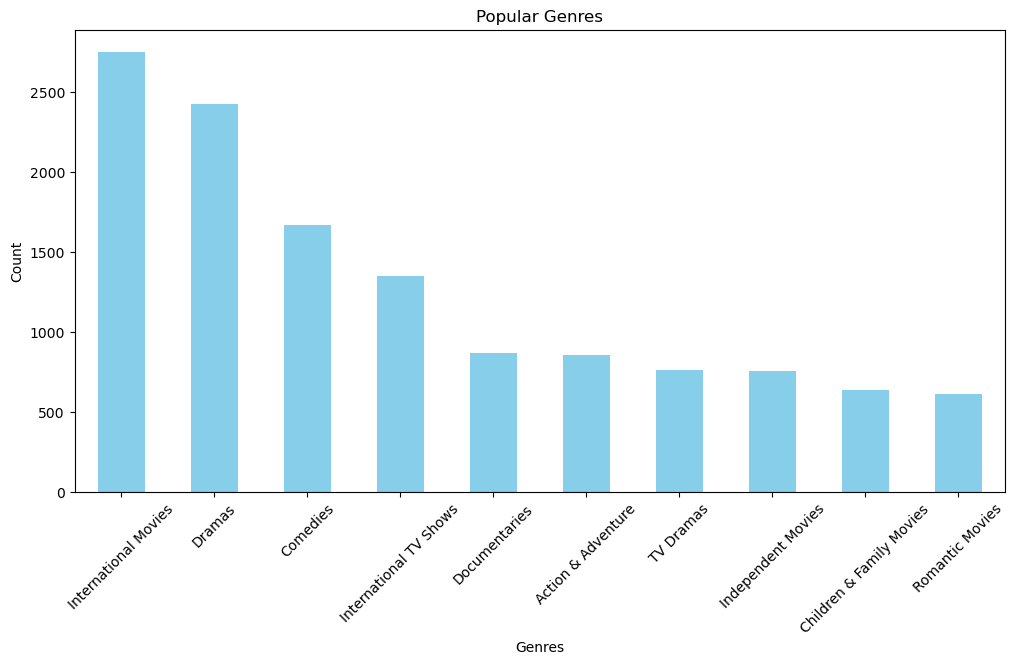

In [ ]:
# Extract the genres
genres = df['listed_in'].str.split(', ').explode()

# Count the occurrences of each genre
genre_counts = genres.value_counts()

# Select the top 10 popular genres
top_genres = genre_counts.head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
top_genres.plot(kind='bar', color='skyblue')

# Add labels and title
plt.xlabel('Genres')
plt.ylabel('Count')
plt.title('Popular Genres')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Display the plot
plt.show()

**Observations**
* Most Content in Netflix;
  * International Movies, Dramas and Comedies
* There is international Movies and Tv shows in top five, and I think this is good for Netflix. We can say, Netflix has users around the world.
* If we look just regular genres; Drama is first. Because drama mostly related almost every other genre. There's not a lot movies or TV Shows pure Drama.
* Other Coming genre is Comedies, and this is I think Obvious, because reel world losing funniness. We need to laugh more.

#### 6. Duration Analysis

1. How do movies length change on netflix? Let's look.

Duration Summary Statistics:
Minimum duration: 3 min
Maximum duration: 312 min
Mean duration: 99.58 min
Median duration: 98.00 min


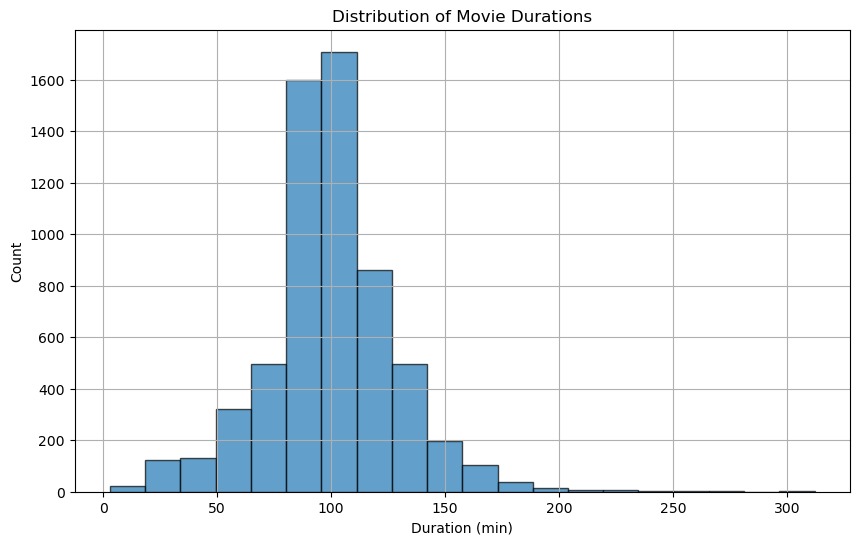

In [134]:
# Extract the movie durations without 'missing' values
movie_durations = df[(df['type'] == 'Movie') & (df['duration'] != 'missing')]['duration']

# Convert the durations to numeric values (remove 'min' suffix)
movie_durations = movie_durations.str.replace(' min', '').astype(int)

# Calculate summary statistics
min_duration = movie_durations.min()
max_duration = movie_durations.max()
mean_duration = movie_durations.mean()
median_duration = movie_durations.median()

# Print the summary statistics
print("Duration Summary Statistics:")
print("Minimum duration: {} min".format(min_duration))
print("Maximum duration: {} min".format(max_duration))
print("Mean duration: {:.2f} min".format(mean_duration))
print("Median duration: {:.2f} min".format(median_duration))

# Create a histogram of movie durations
plt.figure(figsize=(10, 6))  # Set the figure size
plt.hist(movie_durations, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Duration (min)')
plt.ylabel('Count')
plt.title('Distribution of Movie Durations')
plt.grid(True)
plt.show()

**Observations**
* The average movie length is around 100 minutes.
* And median is 98 minutes.
* Density of duration not really variant, we can see this from median and mean values, they are close to each other. We can say, around 100 min. ideal for audience.

2. What about TV Shows? Which season more on demand?

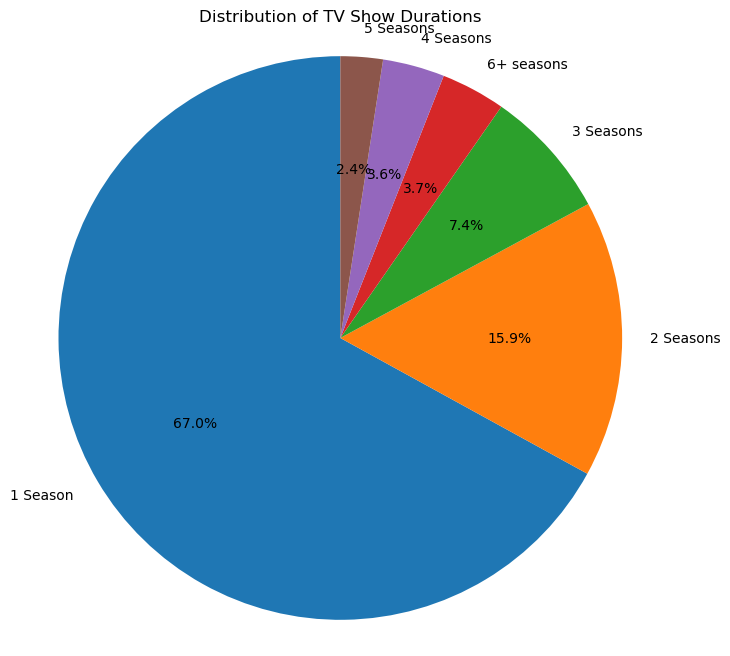

In [128]:
# Filter TV show durations without 'missing' values
tv_show_durations = df[(df['type'] == 'TV Show') & (df['duration'] != 'missing')]['duration']

# Combine durations after 6 seasons into a single category
tv_show_durations = tv_show_durations.apply(lambda x: '6+ seasons' if int(x.split(' ')[0]) >= 6 else x)

# Count the occurrences of each duration
duration_counts = tv_show_durations.value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(duration_counts, labels=duration_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of TV Show Durations')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the chart
plt.show()

**Observations**
* 67% of tv shows are 1 season, short and sweet.
* 2 seasons tv shows are 15.9% and 3 seasons tv shows are 7.4% and keeps decreasing. That's normal because, sometimes I want to sit and binge a TV Show. This is imposable if I want to watch Dexter again.

#### 7. Word Cloud From Content Descriptions

By looking at the descriptions of the content of movies or TV series, we can say how the content is consumed more. There is always a supply and demand relation.

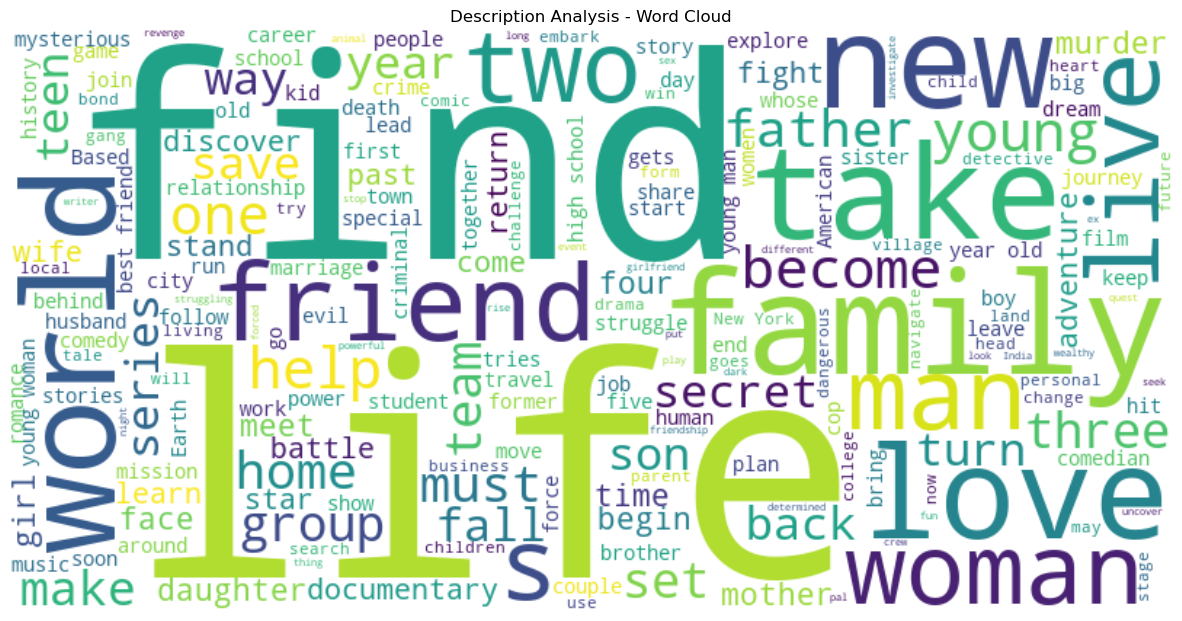

In [137]:
# Filter out missing description values
description_data = df[df['description'] != 'missing']['description']

# Join all the cast names into a single string
description_text = ' '.join(description_data)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(description_text)

# Create a figure and axes
fig, ax = plt.subplots(figsize=(15, 10))

# Display the word cloud
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_title('Description Analysis - Word Cloud')
ax.axis('off')

# Show the plot
plt.show()

**Observations**
* We can see most used words in here. And we can say in here, which sides more important for us in life.
  * Of course ***Life*** is itself more important than everything, 
  * Maybe ***find***ing ***love*** and creating a great ***family*** with good ***friend***s
  * With these comes a ***new*** ***world*** for us.
  * In ***year***s ***man*** ***become*** a ***father*** and ***woman*** ***become*** a ***mother***. 
  * To ***discover*** ***life*** ***must*** first ***fall***
  * ***Make***ing a good ***home*** needs a ***battle***

## Machine Learning Modeling

1. Label Encoding
* Which Features needs Label Encoding

In [ ]:
# Object Features
df.select_dtypes(include=['object']).columns.tolist()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'rating',
 'duration',
 'listed_in',
 'description']

In [ ]:
def label_encoder(df, column):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    
    return df, le.classes_

In [ ]:
# Convert all categorical columns in numerical
label_encoder(df, "show_id")
label_encoder(df, "type")
label_encoder(df, "title")
label_encoder(df, "director")
label_encoder(df, "cast")
label_encoder(df, "country")
label_encoder(df, "date_added")
label_encoder(df, "rating")
label_encoder(df, "duration")
label_encoder(df, "listed_in")
label_encoder(df, "description")

(      show_id  type  title  director  cast  country  date_added  release_year  rating  duration  listed_in  description
 0           0     0   1975      2295  7677      603        1711          2020       4       210        274         2577
 1        1111     1   1091      4516   409      426        1706          2021       8       110        414         1762
 2        2222     1   2651      2105  6296      748        1706          2021       8         0        242         7341
 3        3333     1   3506      4516  7677      748        1706          2021       8         0        297         3617
 4        4444     1   3861      4516  4815      251        1706          2021       8       110        393         4416
 ...       ...   ...    ...       ...   ...      ...         ...           ...     ...       ...        ...          ...
 8802     8671     0   8770       979  4677      603        1419          2007       5        70        269          895
 8803     8672     1   8773     

2. Linear Regression Model

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description'], dtype='object')

In [ ]:
# Divide the data depented and independent variable
X = df.drop('rating', axis=1)  # Independent 
y = df['rating']  # Dependent

In [ ]:
# Normalize the data using the Standart Scaler
ss = StandardScaler()
X = ss.fit_transform(X)

In [ ]:
def model_linear_regression(X, y):
    # Split the data train(%80) and test (%20)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

    #fit the train data to the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # mse from train
    train_predictions = model.predict(X_train)
    train_mse = mean_squared_error(y_train, train_predictions)

    # mse from test 
    test_predictions = model.predict(X_test)
    test_mse = mean_squared_error(y_test, test_predictions)

    return train_mse, test_mse

model_linear_regression(X, y)

(3.2728360639378486, 3.166668189191538)